In [110]:
from math import radians, cos, sin, asin, sqrt, ceil, floor
from scipy.interpolate import griddata
from scipy import ndimage

import pandas as pd
import scipy
import matplotlib.pyplot as plt
import numpy as np
import gmaps
import json
import re
gmaps.configure(api_key="")

In [2]:
file = "D:\LACrime\crime-data-from-2010-to-present.csv"
df = pd.read_csv(file, engine='python')

In [3]:
print(len(df.index))
df.head()

1936093


,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,131318519,2013-09-20T00:00:00,2010-09-10T00:00:00,2200,13.0,Newton,1313,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",1803 0344,...,NaN,AA,Adult Arrest,668.0,NaN,NaN,NaN,700 E WASHINGTON BL,NaN,"{'longitude': '-118.2574', 'human_address': '{..."
1,160106330,2016-01-29T00:00:00,2010-01-01T00:00:00,700,1.0,Central,152,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",1803 0344,...,NaN,IC,Invest Cont,668.0,NaN,NaN,NaN,500 S GRAND AV,NaN,"{'longitude': '-118.254', 'human_address': '{""..."
2,171908002,2017-03-16T00:00:00,2010-09-15T00:00:00,2045,19.0,Mission,1901,626,INTIMATE PARTNER - SIMPLE ASSAULT,2000 0416 2002,...,BELT FLAILING INSTRUMENT/CHAIN,AO,Adult Other,626.0,NaN,NaN,NaN,FOOTHILL BL,GLENOAKS AV,"{'longitude': '-118.4716', 'human_address': '{..."
3,171608778,2017-04-19T00:00:00,2010-01-01T00:00:00,700,16.0,Foothill,1611,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,0500 0522,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,812.0,860.0,NaN,NaN,13300 BROWNELL ST,NaN,"{'longitude': '-118.426', 'human_address': '{""..."
4,171608779,2017-04-19T00:00:00,2010-01-01T00:00:00,700,16.0,Foothill,1611,810,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...",0500 0515,...,NaN,IC,Invest Cont,810.0,812.0,NaN,NaN,13300 BROWNELL ST,NaN,"{'longitude': '-118.426', 'human_address': '{""..."


In [4]:
df.columns

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location '],
      dtype='object')

In [5]:
drop_cols = [
    'Area ID',
    'Area Name',
    'Reporting District',
    'MO Codes',
    'Victim Age',
    'Victim Sex',
    'Victim Descent',
    'Premise Code',
    'Premise Description',
    'Weapon Used Code',
    'Weapon Description',
    'Status Code',
    'Status Description',
    'Crime Code 1',
    'Crime Code 2',
    'Crime Code 3',
    'Crime Code 4',
    'Crime Code',
    'Date Reported'
]

df = df.drop(drop_cols, axis=1)
df.columns

Index(['DR Number', 'Date Occurred', 'Time Occurred', 'Crime Code Description',
       'Address', 'Cross Street', 'Location '],
      dtype='object')

In [6]:
sorted(df['Crime Code Description'].unique())


['ABORTION/ILLEGAL',
 'ARSON',
 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',
 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
 'ATTEMPTED ROBBERY',
 'BATTERY - SIMPLE ASSAULT',
 'BATTERY ON A FIREFIGHTER',
 'BATTERY POLICE (SIMPLE)',
 'BATTERY WITH SEXUAL CONTACT',
 'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM',
 'BIGAMY',
 'BIKE - ATTEMPTED STOLEN',
 'BIKE - STOLEN',
 'BLOCKING DOOR INDUCTION CENTER',
 'BOAT - STOLEN',
 'BOMB SCARE',
 'BRANDISH WEAPON',
 'BRIBERY',
 'BUNCO, ATTEMPT',
 'BUNCO, GRAND THEFT',
 'BUNCO, PETTY THEFT',
 'BURGLARY',
 'BURGLARY FROM VEHICLE',
 'BURGLARY FROM VEHICLE, ATTEMPTED',
 'BURGLARY, ATTEMPTED',
 'CHILD ABANDONMENT',
 'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',
 'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
 'CHILD ANNOYING (17YRS & UNDER)',
 'CHILD NEGLECT (SEE 300 W.I.C.)',
 'CHILD PORNOGRAPHY',
 'CHILD STEALING',
 'CONSPIRACY',
 'CONTEMPT OF COURT',
 'CONTRIBUTING',
 'COUNTERFEIT',
 'CREDIT CARDS, FRAUD USE ($950 & UNDER',
 'CREDIT 

In [7]:
with pd.option_context("display.max_rows", 500):
    print(df.groupby('Crime Code Description').count())

                                                    DR Number  Date Occurred  \
Crime Code Description                                                         
ABORTION/ILLEGAL                                            6              6   
ARSON                                                    3180           3180   
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER             1484           1484   
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT          83941          83941   
ATTEMPTED ROBBERY                                       11054          11054   
BATTERY - SIMPLE ASSAULT                               175365         175365   
BATTERY ON A FIREFIGHTER                                  300            300   
BATTERY POLICE (SIMPLE)                                  4392           4392   
BATTERY WITH SEXUAL CONTACT                             10178          10178   
BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT ...         24             24   
BIGAMY                                  

In [8]:
drop_crimes = set([
    'ABORTION/ILLEGAL',
    'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM',
    'BIGAMY',
    'BLOCKING DOOR INDUCTION CENTER',
    'BOAT - STOLEN',
    'CONSPIRACY',
    'CREDIT CARDS, FRAUD USE ($950 & UNDER',
    'CREDIT CARDS, FRAUD USE ($950.01 & OVER)',
    'CONTEMPT OF COURT',
    'CONTRIBUTING',
    'COUNTERFEIT',
    'CRUELTY TO ANIMALS',
    'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER',
    'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $400',
    'DISHONEST EMPLOYEE - GRAND THEFT',
    'DISHONEST EMPLOYEE - PETTY THEFT',
    'DISHONEST EMPLOYEE ATTEMPTED THEFT',
    'DOCUMENT FORGERY / STOLEN FELONY',
    'DOCUMENT WORTHLESS ($200 & UNDER)',
    'DOCUMENT WORTHLESS ($200.01 & OVER)',
    'DRIVING WITHOUT OWNER CONSENT (DWOC)',
    'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
    'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)',
    'FAILURE TO YIELD',
    'FALSE IMPRISONMENT',
    'FALSE POLICE REPORT',
    'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
    'PANDERING',
    'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)',
    'TELEPHONE PROPERTY - DAMAGE',
    'THEFT OF IDENTITY',
    'UNAUTHORIZED COMPUTER ACCESS',
])

df = df[~df['Crime Code Description'].isin(drop_crimes)]


In [9]:
df['Date Occurred'] = pd.to_datetime(df['Date Occurred'])
df = df.rename(index=str, columns={"Location ": "Location"}) # Column name has extra space
df.head()

,DR Number,Date Occurred,Time Occurred,Crime Code Description,Address,Cross Street,Location
2,171908002,2010-09-15,2045,INTIMATE PARTNER - SIMPLE ASSAULT,FOOTHILL BL,GLENOAKS AV,"{'longitude': '-118.4716', 'human_address': '{..."
3,171608778,2010-01-01,700,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,13300 BROWNELL ST,NaN,"{'longitude': '-118.426', 'human_address': '{""..."
4,171608779,2010-01-01,700,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...",13300 BROWNELL ST,NaN,"{'longitude': '-118.426', 'human_address': '{""..."
5,170512370,2010-11-03,1,OTHER MISCELLANEOUS CRIME,2100 JOHN S GIBSON BL,NaN,"{'longitude': '-118.2884', 'human_address': '{..."
7,100100501,2010-01-02,2100,"RAPE, ATTEMPTED",8TH ST,SAN PEDRO ST,"{'longitude': '-118.2488', 'human_address': '{..."


In [23]:
random_week_start = '2019-03-03'
random_week_end = '2019-03-29'
date_df = df[(df['Date Occurred'] >= random_week_start) & (df['Date Occurred'] <= random_week_end)]

In [17]:
crime_dict = date_df['Location'].to_dict()
reg = r'\-?\d+.\d+'
re.findall(reg, crime_dict[list(crime_dict.keys())[0]])

['-118.2374', '34.0563']

In [89]:
crime_dict = date_df['Location'].to_dict()
# get (lat, lon) pairs
crimes = [[float(num) for num in re.findall(reg, crime_dict[loc])[::-1]] for loc in crime_dict]

top_left = (34.105999, -118.465381)
bot_left = (34.016907, -118.465381)
top_right = (34.105999,-118.138795)
bot_right = (34.016907,-118.138795)

top_lat, left_lon = top_left
bot_lat, right_lon = bot_right

triangleCoords = [
    top_left, top_right, bot_right, bot_left
];

bermudaTriangle = gmaps.Polygon(triangleCoords); # Welp
drawing = gmaps.drawing_layer(
    features=[bermudaTriangle],
    show_controls=False
)
fig = gmaps.figure()
fig.add_layer(drawing)

def get_keep_indices(crimes):
    keep_indices = []
    for i, (lat, lon) in enumerate(crimes):
        if bot_lat <= lat <= top_lat and left_lon <= lon <= right_lon:
            keep_indices.append(i)
    return keep_indices

keep_indices = get_keep_indices(crimes)
crimes = [crimes[i] for i in keep_indices]
print(len(crimes))

markers = gmaps.heatmap_layer(crimes)
fig.add_layer(markers)
fig

3701


Figure(layout=FigureLayout(height='420px'))

In [59]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3956 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

print("Distance across approx: {} miles".format(haversine(top_left[1], top_left[0], top_right[1], top_right[0])))
print("Distance top to bottom approx: {} miles".format(haversine(top_left[1], top_left[0], bot_left[1], bot_left[0])))

Distance across approx: 18.670769651560317 miles
Distance top to bottom approx: 6.15137720431037 miles


In [90]:
width = top_right[1] - top_left[1]
height = top_right[0] - bot_right[0]
# Assign crime points to uniform grid
boxes_y = 12
box_dim = (height / boxes_y)# Grid square dimension
boxes_x = ceil(width / box_dim)
start_y, start_x = top_left

#! Grid traversal
for y in range(boxes_y):
    for x in range(boxes_x):
        tl = (start_y - y * box_dim, start_x + (x + 1) * box_dim)
        bl = (start_y - (y + 1) * box_dim, start_x + (x + 1) * box_dim)
        tr = (start_y - y * box_dim, start_x + x * box_dim)
        br = (start_y - (y + 1) * box_dim, start_x + x * box_dim)
        triangleCoords = [
            tl, tr, br, bl
        ];
        bermudaTriangle = gmaps.Polygon(triangleCoords); # Welp
        drawing = gmaps.drawing_layer(
            features=[bermudaTriangle],
            show_controls=False
        )
        fig.add_layer(drawing)

fig

Figure(layout=FigureLayout(height='420px'))

In [91]:
print("Distance across box approx: {} miles".format(haversine(0, box_dim, 0, 0)))

Distance across box approx: 0.512614767025875 miles


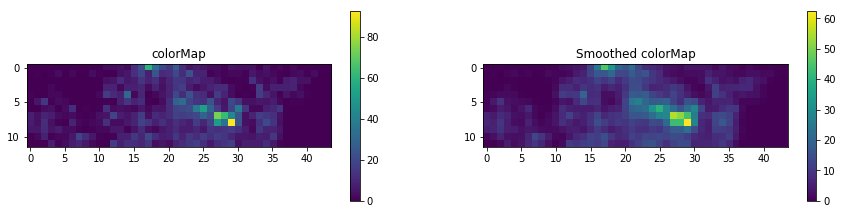

In [149]:
bins = np.zeros(shape=(boxes_y, boxes_x))

#! Converts lat lon positions to grid cell and adds crime to bin
for lat, lon in crimes:
    scaled_lat = (start_y - lat) / height
    scaled_lon = (lon - start_x) / width
    loc_x = min(boxes_x - 1, floor(scaled_lon * boxes_x))
    loc_y = min(boxes_y - 1, floor(scaled_lat * boxes_y))
    bins[loc_y, loc_x] += 1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3.5))
ax1.set_title('colorMap')
im = ax1.imshow(bins)
fig.colorbar(im, orientation='vertical', ax=ax1)

mesh_test = scipy.ndimage.filters.gaussian_filter(bins, sigma = .55)

im = ax2.imshow(mesh_test)
ax2.set_title('Smoothed colorMap')
fig.colorbar(im, orientation='vertical', ax=ax2)



C:\Users\Christopher Qian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Writing bin 0
Writing bin 1
Writing bin 2
Writing bin 3
Writing bin 4
Writing bin 5
Writing bin 6
Writing bin 7
Writing bin 8
Writing bin 9
Writing bin 10
Writing bin 11
Writing grid metadata


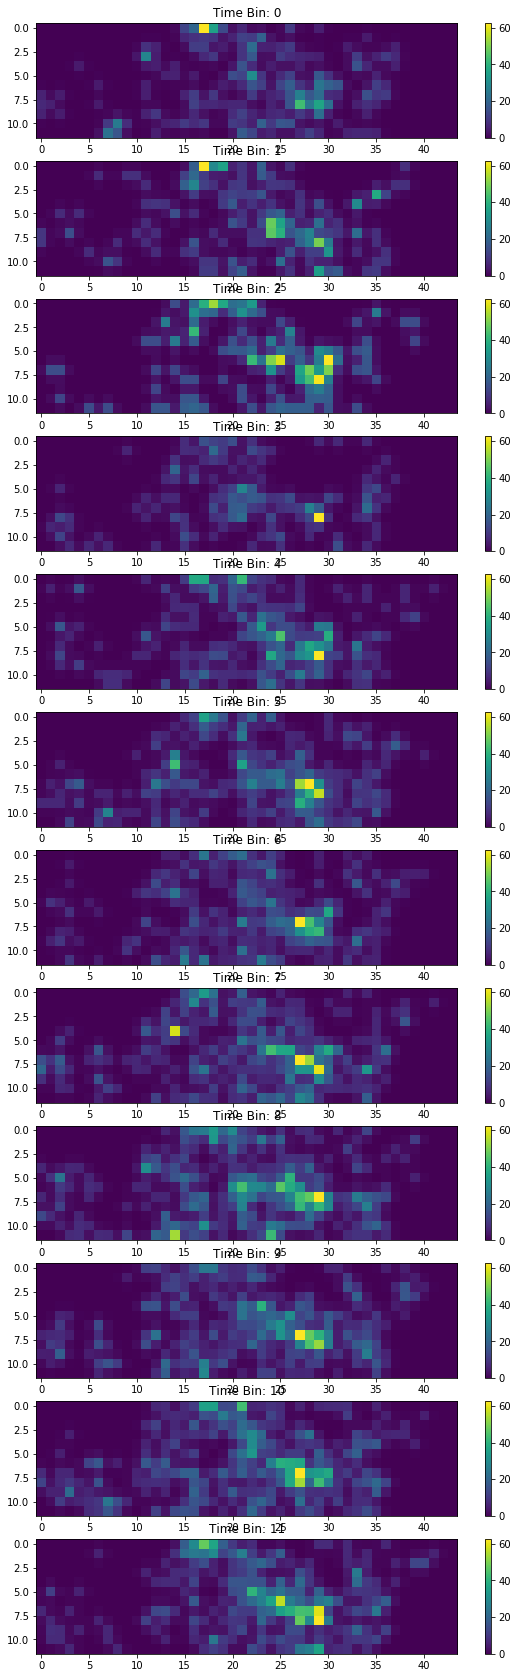

In [184]:
# Final processing
week_start = '2016-03-03'
recent_df = df[(df['Date Occurred'] >= random_week_start)]
recent_df['Time Bins'] = recent_df['Time Occurred'].apply(lambda x: (int(x)) // 200)

fig, ax = plt.subplots(12, 1, figsize=(10, 30))
crime_maps = []
for time_bin in range(12):
    df_slice = recent_df[recent_df['Time Bins'] == time_bin]
    crime_dict = df_slice['Location'].to_dict()
    # get (lat, lon) pairs
    crimes = [[float(num) for num in re.findall(reg, crime_dict[loc])[::-1]] for loc in crime_dict]
    keep_indices = get_keep_indices(crimes)
    crimes = [crimes[i] for i in keep_indices]
    bins = np.zeros(shape=(boxes_y, boxes_x))

    for lat, lon in crimes:
        scaled_lat = (start_y - lat) / height
        scaled_lon = (lon - start_x) / width
        loc_x = min(boxes_x - 1, floor(scaled_lon * boxes_x))
        loc_y = min(boxes_y - 1, floor(scaled_lat * boxes_y))
        bins[loc_y, loc_x] += 1
                      
    mesh_test = scipy.ndimage.filters.gaussian_filter(bins, sigma = .5) # Tune sigma
    #Map visuals
    ax[time_bin].imshow(mesh_test)
    ax[time_bin].set_title("Time Bin: {}".format(time_bin))
    fig.colorbar(im, orientation='vertical', ax=ax[time_bin])
    
    print("Writing bin {}".format(time_bin))
    with open('data/crime-grid-{}.json'.format(time_bin), 'w+') as file:
        json.dump(mesh_test.tolist(), file)
        
meta_data = {
    'top_lat': top_lat, # Upper horizontal bound
    'bot_lat': bot_lat, # Lower horizontal bound
    'left_lon': left_lon, # Left vertical bound
    'right_lon': right_lon, # Right vertical bound,
    'num_x_boxes': boxes_x, # Number boxes to fill one row of grid
    'num_y_boxes': boxes_y, # Number boxes to fill one col of grid
    'box_dim': box_dim # Width = height of box in degrees
} # Grids start at the top left and move down towards the bottom right

print("Writing grid metadata")
with open('data/grid-metadata.json', 'w+') as file:
    json.dump(meta_data, file)
